# Preprocesamiento de los datos

En esta sección, llevaremos a cabo las transformaciones necesarias en los datos. Utilizaremos la técnica de *one-hot encoding* para las variables categóricas, convirtiéndolas en variables *dummy*. Además, aplicaremos la transformación Z a las columnas numéricas.

#### 1. Lectura del dataset

Para iniciar, procederemos a leer el conjunto de datos desde el archivo *cars.csv* utilizando la biblioteca *pandas*.

In [12]:
import pandas as pd

cars = pd.read_csv("cars.csv")
cars.head()

,car_id,symboling,car_name,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,...,engine_size,fuel_system,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,1,3,alfa_romero_giulia,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa_romero_stelvio,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa_romero_quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi_100_ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi_100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### 2. Transformación de variables categóricas a dummy

A continuación, realizaremos la transformación de las variables categóricas en variables *dummy* mediante la técnica de *one-hot encoding*.

In [13]:

# Hacemos una lista de las columnas que se van a convertir en dummy
categorical_columns = cars[['symboling', 'fuel_type', 'aspiration', 'door_number', 'car_body',
                             'engine_location', 'drive_wheel', 'engine_type', 'cylinder_number',
                             'fuel_system']]

#Creación del Dataframe con el resto de las columnas
cars2 = cars.drop(categorical_columns,axis=1)

# Transformar variables categóricas en dummies
# Ponemos el parametro de drop_first=True para evitar la multicolinealidad
# Ponemos el parametro de dtype=int para que nos regrese números enteros
categorical_columns_dummies = pd.get_dummies(categorical_columns,dtype=int,drop_first=True) 

# Concatenar ambos dataframes para obtener todas las columas
cars = pd.concat([cars2, categorical_columns_dummies], axis=1)

#Imprimimos las columnas
print(cars.columns)


Index(['car_id', 'car_name', 'wheel_base', 'car_length', 'car_width',
       'car_height', 'curb_weight', 'engine_size', 'bore_ratio', 'stroke',
       'compression_ratio', 'horse_power', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price', 'symboling', 'door_number', 'cylinder_number',
       'fuel_type_gas', 'aspiration_turbo', 'car_body_hardtop',
       'car_body_hatchback', 'car_body_sedan', 'car_body_wagon',
       'engine_location_rear', 'drive_wheel_fwd', 'drive_wheel_rwd',
       'engine_type_dohcv', 'engine_type_l', 'engine_type_ohc',
       'engine_type_ohcf', 'engine_type_ohcv', 'engine_type_rotor',
       'fuel_system_2bbl', 'fuel_system_4bbl', 'fuel_system_idi',
       'fuel_system_mfi', 'fuel_system_mpfi', 'fuel_system_spdi',
       'fuel_system_spfi'],
      dtype='object')


#### 3. Transformación columnas numéricas

Luego de la transformación de las variables categóricas, procederemos a normalizar las columnas numéricas utilizando la estandarización Z.

In [14]:
#Importamos la libreria
from sklearn.preprocessing import StandardScaler



# Columnas numéricas 
numeric_columns = ['wheel_base', 'car_length', 'car_width', 'car_height', 'curb_weight',
                                   'engine_size', 'bore_ratio', 'stroke', 'compression_ratio',
                                   'horse_power', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

# Creación de dataframe que solo incluya las columnas numéricas
df_numeric_columns = cars[numeric_columns]

#Creación de dataframe con las columnas originales
cars2 = cars.drop(numeric_columns, axis=1)

# Aplicar la estandarización Z a las columnas numéricas
scaler = StandardScaler()
numeric_columns_standardized = scaler.fit_transform(df_numeric_columns)
numeric_columns_standardized_df = pd.DataFrame(numeric_columns_standardized, columns=numeric_columns)

# Combinar las columnas estandarizadas con las categóricas dummy y otras columnas originales
cars = pd.concat([numeric_columns_standardized_df, cars2], axis=1)

cars.head()

,wheel_base,car_length,car_width,car_height,curb_weight,engine_size,bore_ratio,stroke,compression_ratio,horse_power,...,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,0,0,0,0,0,0,0,1,0,0
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,0,0,0,0,0,0,0,1,0,0
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,0,1,0,0,0,0,0,1,0,0
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,0,0,0,0,0,0,0,1,0,0
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,0,0,0,0,0,0,0,1,0,0


# Modelos de Regresión

En esta sección, se realizará el proceso de  entrenar y evaluar diversos modelos de regresión con el objetivo de estimar el precio de vehículos. Para la evaluación se usará  la validación cruzada, mientras que la identificación de características más relevantes se llevará a cabo con SequentialFeatureSelection de la biblioteca scikit-learn. El objetivo es comparar el rendimiento de estos modelos y discernir cuál es el más apto para nuestro conjunto de datos.

**Modelos a utilizar:**

- LinearRegression
- DecisionTreeRegressor
- RandomForestRegressor
- SVR
- KNeighborsRegressor
- GradientBoostingRegressor


#### 1. Importación de bibliotecas

Comenzamos importando las bibliotecas necesarias para nuestro análisis.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import  GridSearchCV
import warnings
from time import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

warnings.filterwarnings("ignore")

#### 2. Creación de la función de la validación cruzada

La función `validacion_cruzada_regresion` realiza la validación cruzada para evaluar el rendimiento de un modelo de regresión. Aquí está una explicación detallada:

1. **Parámetros de la función:**
   - `modelo`: El modelo de regresión a evaluar.
   - `X`: Matriz de características (variables independientes).
   - `y`: Vector de la variable objetivo (variable dependiente).
   - `cv`: Número de divisiones en la validación cruzada (por defecto es 5).

2. **Definición de Métricas:**
   - Se definen cuatro métricas de evaluación: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), y R-squared (R2). Cada métrica se establece como un "scorer" utilizando la función `make_scorer` de scikit-learn.

3. **Validación Cruzada:**
   - Se utiliza la función `cross_val_score` para realizar la validación cruzada del modelo utilizando las métricas definidas. Esto se realiza por separado para cada métrica.

4. **Cálculo de Promedios:**
   - Se calcula el promedio de cada métrica sobre las diferentes divisiones de la validación cruzada.

5. **Resultado:**
   - La función devuelve los promedios de MAE, MSE, RMSE y R2, que son medidas resumidas del rendimiento del modelo en la validación cruzada.

In [16]:
def validacion_cruzada_regresion(modelo, X, y, cv=5):
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=True)
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=True)
    rmse_scorer = make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared=False), greater_is_better=True)
    r2_scorer = make_scorer(r2_score)

    mae = cross_val_score(modelo, X, y, cv=cv, scoring=mae_scorer)
    mse = cross_val_score(modelo, X, y, cv=cv, scoring=mse_scorer)
    rmse = cross_val_score(modelo, X, y, cv=cv, scoring=rmse_scorer)
    r2 = cross_val_score(modelo, X, y, cv=cv, scoring=r2_scorer)

    return np.mean(mae), np.mean(mse), np.mean(rmse), np.mean(r2)

#### 3.- Creación de  función  buscar_hiperparametros 

La función `buscar_hiperparametros` se encarga de realizar una búsqueda  de hiperparámetros para un modelo dado utilizando GridSearchCV. 

1. **Parámetros de la función:**
   - `modelo`: Representa el modelo para el cual se realizará la búsqueda de hiperparámetros.
   - `parametros`: Corresponde al diccionario de hiperparámetros a explorar.
   - `X`: Matriz de características (variables independientes).
   - `y`: Vector de la variable objetivo (variable dependiente).
   - `cv`: Número de divisiones en la validación cruzada (valor por defecto: 5).

2. **Configuración del Scorer:**
   - Se crea un objeto "scorer" utilizando la métrica de evaluación R-squared (R2). Este objeto será utilizado para evaluar el rendimiento del modelo durante la búsqueda de hiperparámetros.

3. **Configuración de la Búsqueda de Grilla:**
   - Se utiliza `GridSearchCV` de scikit-learn para configurar la búsqueda exhaustiva de hiperparámetros. Se especifica el modelo, los parámetros a explorar, la métrica de evaluación, el número de divisiones en la validación cruzada (`cv`), y se permite el uso de todos los núcleos disponibles (`n_jobs=-1`).

4. **Realización de la Búsqueda de Grilla:**
   - Se ejecuta la búsqueda de grilla utilizando los datos de entrenamiento (`X` e `y`).

5. **Resultado:**
   - La función devuelve el objeto `grid_search`, que contiene información sobre la mejor combinación de hiperparámetros encontrada durante la búsqueda.





In [30]:
def buscar_hiperparametros(modelo, parametros, X, y, cv=5):
    # Crea un objeto scorer para la métrica de evaluación
    scorer = make_scorer(r2_score)

    # Configura la búsqueda de grilla
    grid_search = GridSearchCV(modelo, parametros, scoring=scorer, cv=cv, n_jobs=-1)

    # Realiza la búsqueda de grilla en los datos de entrenamiento
    grid_search.fit(X, y)

    return grid_search

#### 4. Función de Entrenamiento y Evaluación del Modelo

La función `entrenamiento_evaluacion_regresion` realiza el entrenamiento y la evaluación de un modelo de regresión. 

1. **Verificación del Modelo:**
   - Se verifica que el nombre del modelo (`model_name`) esté presente en el diccionario de modelos (`models`). Si no se encuentra, se genera un error.

2. **División de Datos:**
   - Los datos se dividen en conjuntos de entrenamiento y prueba utilizando `train_test_split`.

3. **Selección de Características:**
   - Se utiliza `SequentialFeatureSelector` para seleccionar las mejores características de manera secuencial y automática.

4. **Búsqueda de Hiperparámetros:**
   - Se utiliza la función `buscar_hiperparametros` para realizar una búsqueda de hiperparámetros utilizando GridSearchCV.

5. **Impresión de Información del Modelo:**
   - Se imprime información sobre las características seleccionadas y los mejores parámetros encontrados.

6. **Validación Cruzada del Conjunto de Entrenamiento:**
   - Se realiza la validación cruzada utilizando la función `validacion_cruzada_regresion` y se imprime el Error Absoluto Medio, Error Cuadrático Medio, Raíz del Error Cuadrático Medio y Coeficiente de Determinación para el conjunto de entrenamiento.

7. **Tiempo de Ejecución:**
   - Se mide y muestra el tiempo total de ejecución.

8. **Predicciones y Evaluación en el Conjunto de Prueba:**
   - Se realiza la predicción en el conjunto de prueba y se evalúa el rendimiento utilizando R-squared. Se visualiza un gráfico de dispersión con una línea de referencia a 45 grados.

9. **Creación de DataFrame de Métricas:**
   - Se crea un DataFrame con las métricas de rendimiento para el modelo.

10. **Retorno del DataFrame:**
    - La función devuelve el DataFrame con las métricas de rendimiento del modelo.


In [32]:
def entrenamiento_evaluacion_regresion(model_name, X, y, cv=5):
    if model_name not in models:
        raise ValueError(f"Modelo {model_name} no se encuentra en el diccionario. Modelos disponibles: {list(models.keys())}")
    
    #Dividimos el conjunto entre entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)
    
    #Iniciamos el contador de tiempo
    start = time()

    if model_name not in models:
        raise ValueError(f"Model {model_name} no se encuentra en el diccionario.")

    base_model, param_grid = models[model_name]
    

    #Busca las mejores características para el modelo
    print(f"Buscando las mejores características para {model_name}...")

    feature_selector = SequentialFeatureSelector(
        base_model,
        n_features_to_select="auto",
        direction="backward",
        scoring="r2",
        tol=-1e-3,
        n_jobs=-1,
    )

    # Ajustar el selector de características
    feature_selector.fit(X_train, y_train)


    # Obtener las características seleccionadas
    selected_features = X_train.columns[feature_selector.support_]
    
    print(f"Características seleccionadas ({len(selected_features)}): {', '.join(selected_features)}")

    # Busqueda de hiperpárametros
    grid_result = buscar_hiperparametros(base_model, param_grid, X_train[selected_features], y_train, cv=cv)
    best_model = grid_result.best_estimator_

    #Imprime los hiperpárametros
    print("\nInformación sobre el modelo seleccionado:")
    print(f"Mejores parámetros: {grid_result.best_params_}")

    # Validación cruzada
    print("\nResultados validación cruzada del dataset de entrenamiento:\n")
    mae, mse, rmse, r2 = validacion_cruzada_regresion(best_model, X_train, y_train, cv=cv)
    print(f"Error Absoluto Medio: {mae:.3f}")
    print(f"Error Cuadrático Medio : {mse:.3f}")
    print(f"Raíz del Error Cuadrático Medio: {rmse:.3f}")
    print(f"Coeficiente de Determinación: {r2:.3f}")
   
    #Terminamos el contador de tiempo
    end = time()
    print(f"Tiempo de ejecución {end - start:.3f}s")

    #Predecimos con el conjunto de prueba
    y_pred = best_model.predict(X_test[selected_features])


    # Calcula R^2 con la predicción y el valor real
    r2_test = r2_score(y_test, y_pred)
    

    # Gráfica de dispersión entre el valor real y el valor predecido
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

    #Agregamos una linea de referencia
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

    # Configurar el título
    plt.title('valores predichos vs valores reales', fontsize=14)
    plt.text(max(y_test), min(y_pred), f'R^2 = {r2_test:.3f}', ha='right', va='bottom', fontsize=12, color='blue')

    # Configuramos los ejes
    plt.xlabel('Valor Real', fontsize=14)
    plt.ylabel('Valor Predecido', fontsize=14)

    plt.tight_layout()
    plt.show()

    # Convertimos las métricas a dataframe
    metrics_df = pd.DataFrame({
        'Modelo': [model_name],
        'Error Absoluto Medio': [mae],
        'Error Cuadrático Medio': [mse],
        'Raíz del Error Cuadrático Medio': [rmse],
        'Coeficiente de Determinación': [r2]

    })
    return metrics_df

#### 5. Definición de Variables Independientes y Dependiente

Ahora procedemos a seleccionar nuestras variables independientes (X) y la variable dependiente (y) para la construcción y evaluación del modelo. Dado que nuestro objetivo es determinar el precio del automovir, consideraremos la columna de  precio como nuestra variable dependiente (y). Las variables independientes (X) incluirán todas las columnas, excepto car_id, car_name y precio.

In [33]:
X =cars.drop(columns=["car_id","car_name",'price'],axis=1)
y=cars["price"]

#### 6. Definición del Diccionario de Modelos (models)

A continuación, procederemos a definir el diccionario `models`, que contendrá los modelos a evaluar junto con sus respectivos hiperparámetros. Este diccionario será utilizado en la función `buscar_hiperparametros`.

In [19]:
#Diccionario de modelos
models = {
    'LinearRegression': (LinearRegression(), {'fit_intercept': [True, False]}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {'max_depth': [2, 4, 6], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['mse', 'friedman_mse', 'mae', 'poisson']}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [1, 3, 4], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 3, 5], 'bootstrap': [True, False], 'criterion': ['squared_error', 'poisson']}),
    'SVR': (SVR(), {'C': [0.1, 0.5, 1], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['scale', 'auto'], 'degree': [1, 2, 3]}),
    'KNeighborsRegressor': (KNeighborsRegressor(), {'n_neighbors': [2, 4, 6], 'weights': ['uniform', 'distance'], 'p': [2, 3], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}),
    'GradientBoostingRegressor': (GradientBoostingRegressor(), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [1, 3, 6], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'subsample': [0.8, 1.0], 'max_features': ['auto', 'sqrt', 'log2']})
}

#### 7. Evaluación y Entrenamiento de los Modelos

Ahora, procedemos a la fase de evaluación y entrenamiento de los modelos utilizando las funciones previamente definidas. Se utilizará el diccionario `models` para evaluar varios modelos con distintas configuraciones de hiperparámetros.

##### Regresión lineal

Buscando las mejores características para LinearRegression...
Características seleccionadas (18): wheel_base, car_length, car_width, car_height, curb_weight, engine_size, peak_rpm, highway_mpg, symboling, car_body_hatchback, car_body_sedan, car_body_wagon, engine_location_rear, drive_wheel_rwd, engine_type_l, engine_type_rotor, fuel_system_2bbl, fuel_system_mpfi

Información sobre el modelo seleccionado:
Mejores parámetros: {'fit_intercept': True}

Resultados validación cruzada del dataset de entrenamiento:

Error Absoluto Medio: 0.273
Error Cuadrático Medio : 0.156
Raíz del Error Cuadrático Medio: 0.388
Coeficiente de Determinación: 0.816
Tiempo de ejecución 11.523s


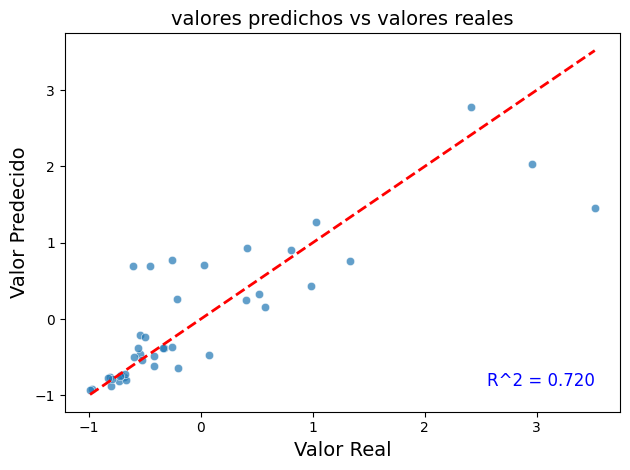

In [34]:
metrics_linear_regression = entrenamiento_evaluacion_regresion("LinearRegression", X, y, cv=5)

##### Árbol de decisión

Buscando las mejores características para DecisionTreeRegressor...
Características seleccionadas (31): car_width, car_height, curb_weight, engine_size, bore_ratio, stroke, highway_mpg, symboling, door_number, cylinder_number, fuel_type_gas, aspiration_turbo, car_body_hardtop, car_body_hatchback, car_body_wagon, engine_location_rear, drive_wheel_fwd, drive_wheel_rwd, engine_type_dohcv, engine_type_l, engine_type_ohc, engine_type_ohcf, engine_type_ohcv, engine_type_rotor, fuel_system_2bbl, fuel_system_4bbl, fuel_system_idi, fuel_system_mfi, fuel_system_mpfi, fuel_system_spdi, fuel_system_spfi

Información sobre el modelo seleccionado:
Mejores parámetros: {'criterion': 'friedman_mse', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}

Resultados validación cruzada del dataset de entrenamiento:

Error Absoluto Medio: 0.280
Error Cuadrático Medio : 0.159
Raíz del Error Cuadrático Medio: 0.409
Coeficiente de Determinación: 0.828
Tiempo de ejecución 4.333s


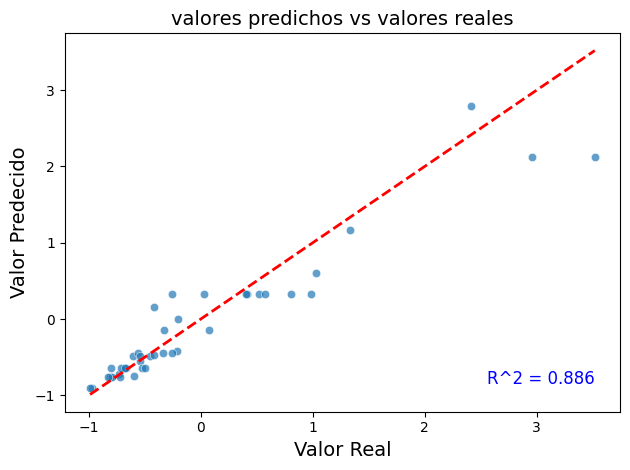

In [35]:
metrics_decision_tree_regressor = entrenamiento_evaluacion_regresion("DecisionTreeRegressor", X, y, cv=5)

##### Bosque aleatorio

Buscando las mejores características para RandomForestRegressor...
Características seleccionadas (29): wheel_base, car_length, car_width, car_height, curb_weight, engine_size, stroke, peak_rpm, city_mpg, highway_mpg, symboling, door_number, cylinder_number, fuel_type_gas, aspiration_turbo, car_body_hardtop, car_body_wagon, drive_wheel_fwd, drive_wheel_rwd, engine_type_dohcv, engine_type_l, engine_type_ohcf, engine_type_ohcv, engine_type_rotor, fuel_system_4bbl, fuel_system_mfi, fuel_system_mpfi, fuel_system_spdi, fuel_system_spfi

Información sobre el modelo seleccionado:
Mejores parámetros: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Resultados validación cruzada del dataset de entrenamiento:

Error Absoluto Medio: 0.228
Error Cuadrático Medio : 0.101
Raíz del Error Cuadrático Medio: 0.308
Coeficiente de Determinación: 0.897
Tiempo de ejecución 117.773s


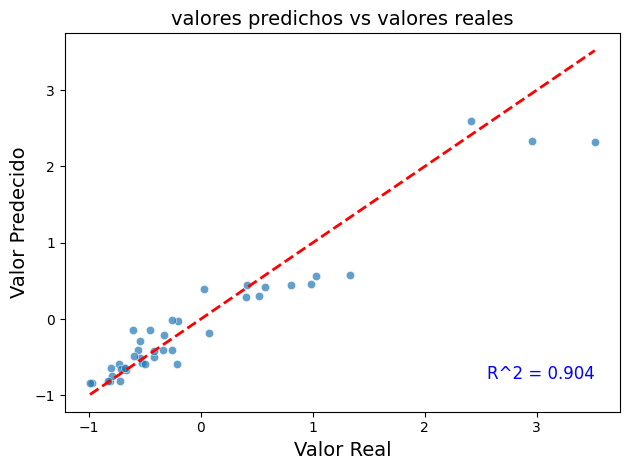

In [36]:
metrics_random_forest_regressor = entrenamiento_evaluacion_regresion("RandomForestRegressor", X, y, cv=5)

##### Vectores de soporte

Buscando las mejores características para SVR...
Características seleccionadas (19): car_width, engine_size, bore_ratio, stroke, compression_ratio, horse_power, peak_rpm, city_mpg, symboling, cylinder_number, car_body_hardtop, car_body_hatchback, car_body_wagon, engine_location_rear, drive_wheel_rwd, engine_type_ohc, engine_type_ohcv, fuel_system_mpfi, fuel_system_spfi

Información sobre el modelo seleccionado:
Mejores parámetros: {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Resultados validación cruzada del dataset de entrenamiento:

Error Absoluto Medio: 0.259
Error Cuadrático Medio : 0.145
Raíz del Error Cuadrático Medio: 0.365
Coeficiente de Determinación: 0.851
Tiempo de ejecución 7.868s


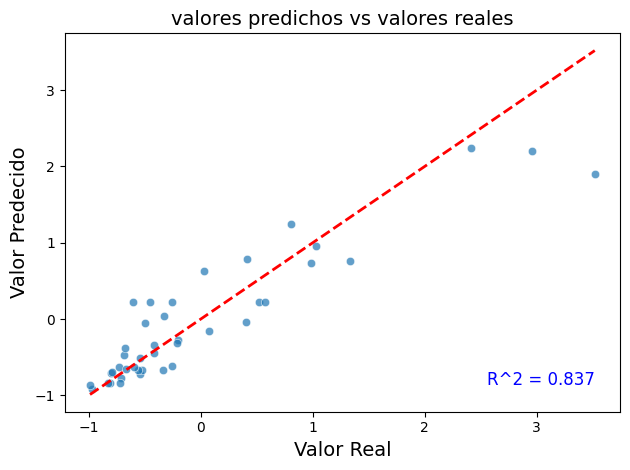

In [37]:
metrics_svr = entrenamiento_evaluacion_regresion("SVR", X, y, cv=5)

##### Vecinos más cercanos

Buscando las mejores características para KNeighborsRegressor...
Características seleccionadas (24): wheel_base, car_length, car_width, car_height, curb_weight, engine_size, horse_power, city_mpg, symboling, door_number, cylinder_number, fuel_type_gas, car_body_hatchback, car_body_sedan, car_body_wagon, drive_wheel_fwd, drive_wheel_rwd, engine_type_l, engine_type_ohc, engine_type_ohcf, fuel_system_2bbl, fuel_system_idi, fuel_system_mpfi, fuel_system_spdi

Información sobre el modelo seleccionado:
Mejores parámetros: {'algorithm': 'auto', 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}

Resultados validación cruzada del dataset de entrenamiento:

Error Absoluto Medio: 0.264
Error Cuadrático Medio : 0.159
Raíz del Error Cuadrático Medio: 0.380
Coeficiente de Determinación: 0.835
Tiempo de ejecución 6.639s


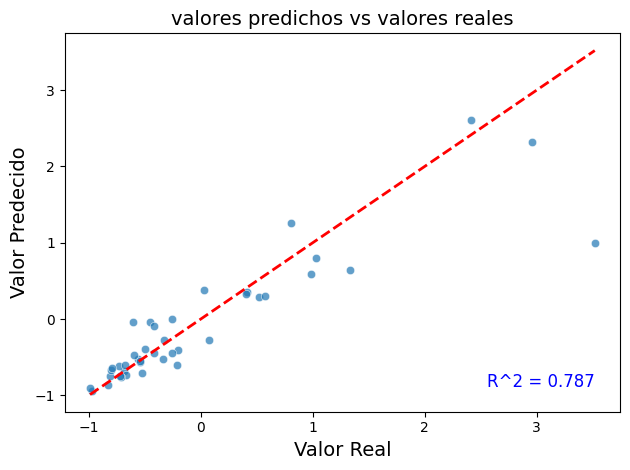

In [38]:

metrics_kneighbors_regressor = entrenamiento_evaluacion_regresion("KNeighborsRegressor", X, y, cv=5)

##### Potenciación del gradiente

Buscando las mejores características para GradientBoostingRegressor...
Características seleccionadas (33): wheel_base, car_length, car_width, car_height, curb_weight, engine_size, stroke, compression_ratio, peak_rpm, city_mpg, highway_mpg, symboling, door_number, cylinder_number, fuel_type_gas, aspiration_turbo, car_body_hardtop, car_body_hatchback, engine_location_rear, drive_wheel_fwd, drive_wheel_rwd, engine_type_dohcv, engine_type_l, engine_type_ohc, engine_type_ohcf, engine_type_rotor, fuel_system_2bbl, fuel_system_4bbl, fuel_system_idi, fuel_system_mfi, fuel_system_mpfi, fuel_system_spdi, fuel_system_spfi

Información sobre el modelo seleccionado:
Mejores parámetros: {'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}

Resultados validación cruzada del dataset de entrenamiento:

Error Absoluto Medio: 0.199
Error Cuadrático Medio : 0.086
Raíz del Error Cuadrático Medio: 0.278
Coeficien

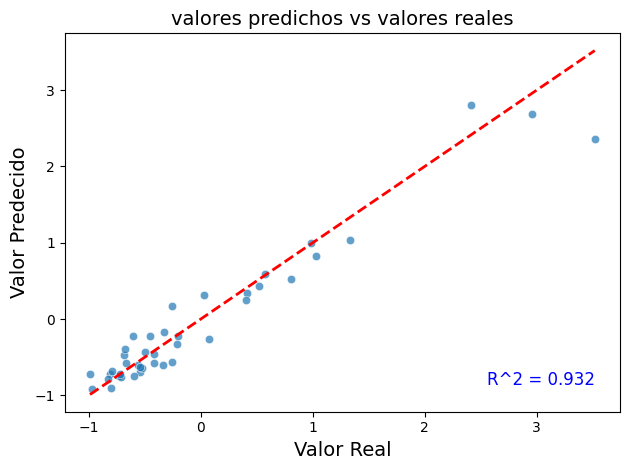

In [39]:
metrics_gradient_boosting_regressor = entrenamiento_evaluacion_regresion("GradientBoostingRegressor", X, y, cv=5)


## Resultados: Comparación de Modelos de Regresión

A continuación, se presenta una tabla comparativa con los resultados obtenidos de los modelos de regresión utilizados en el proyecto. Esta tabla resume las métricas clave que evalúan el rendimiento de cada modelo en la tarea de predicción de precios de automóviles.

**Métricas Utilizadas:**

- **Error Absoluto Medio (MAE):**
  - Representa la media de las diferencias absolutas entre los valores reales y los valores predichos. Cuanto menor sea el MAE, mejor será el modelo.

- **Error Cuadrático Medio (MSE):**
  - Mide la media de los errores al cuadrado entre los valores reales y los predichos. Es más sensible a errores grandes. Un MSE más bajo indica un mejor rendimiento.

- **Raíz del Error Cuadrático Medio (RMSE):**
  - Es simplemente la raíz cuadrada del MSE. Proporciona una medida en la misma escala que la variable objetivo original. Un RMSE más bajo indica un mejor ajuste del modelo.

- **Coeficiente de Determinación (R2):**
  - Representa la proporción de la variabilidad de la variable dependiente que es explicada por el modelo. R2 varía de 0 a 1; un R2 más cercano a 1 indica un mejor ajuste del modelo.


In [40]:

# Concatenar verticalmente los DataFrames
resultados = pd.concat([metrics_linear_regression, metrics_decision_tree_regressor,
                             metrics_random_forest_regressor, metrics_gradient_boosting_regressor,
                             metrics_kneighbors_regressor, metrics_svr], ignore_index=True)


# Definir las columnas para resaltar
columnas_destacadas = ['Error Absoluto Medio', 'Error Cuadrático Medio', 'Raíz del Error Cuadrático Medio']

# Aplicar formato en negrita solo a las columnas numéricas
resultados = resultados.style.apply(lambda col: ['font-weight: bold' if val == col.min() else '' for val in col], axis=0, subset=columnas_destacadas)
resultados = resultados.apply(lambda col: ['font-weight: bold' if val == col.max()  else '' for val in col], axis=0, subset=["Coeficiente de Determinación"])

# Mostrar el dataframe estilizado con la columna 'Modelo' concatenada
resultados



,Modelo,Error Absoluto Medio,Error Cuadrático Medio,Raíz del Error Cuadrático Medio,Coeficiente de Determinación
0,LinearRegression,0.273362,0.155949,0.387908,0.815504
1,DecisionTreeRegressor,0.280416,0.159089,0.409177,0.827882
2,RandomForestRegressor,0.227652,0.101054,0.308399,0.897319
3,GradientBoostingRegressor,0.198691,0.086304,0.277776,0.921388
4,KNeighborsRegressor,0.264156,0.158912,0.379826,0.835219
5,SVR,0.258942,0.144982,0.365205,0.851188


En la tabla, las letras resaltadas en **negrita** indican los valores más destacados de cada métrica. El modelo que ha demostrado ser el más efectivo para este conjunto de datos es la **Potenciación del Gradiente**. Este modelo tiene un coeficiente de determinación más alto, alcanzando **0.921** en el conjunto de entrenamiento y **0.932** en el conjunto de prueba. Además, se destaca por presentar los valores mínimos en las métricas de error (MAE, MSE, RMSE). El modelo de **Potenciación del Gradiente** se considera como la mejor elección para la predicción de precios de automóviles en este proyecto.
